## Recurrent (RNN) Neural Networks

### Neural Networks
#### Neural networks are a series of algorithms that identify underlying relationships in a set of data. These algorithms are heavily based on the way a human brain operates. These networks can adapt to changing input and generate the best result without the requirement to redesign the output criteria.  Deep learning algorithms are based on neural networks.

#### RNN Neural Networks Use Cases
##### Recurrent neural networks are deep learning models that are typically used to solve time series problems. They are used in self-driving cars, high-frequency trading algorithms, and other real-world applications.  They can learn from events that have happened in recent previous iterations of their training stage.

####  Vanishing gradient problem
##### The vanishing gradient problem is caused by the multiplicative nature of the backpropagation algorithm. It means that gradients calculated at a deep stage of the recurrent neural network either have too small of an impact (in a vanishing gradient problem) or too large of an impact (in an exploding gradient problem) on the weights of neurons that are shallower in the neural net.

#### Solving Exploding Gradient Problem 
- modified version of the backpropagation algorithm called truncated backpropagation,  limits that number of timesteps that the backproporation will be performed on
- introduce penalties, which are hard-coded techniques for reduces a backpropagation’s impact as it moves through shallower layers
-  introduce gradient clipping, which introduces an artificial ceiling that limits how large the gradient can become in a backpropagation 

#### Solving Vanising Gradient Problem 
- weight initialization is one technique that can be used, artificially creating an initial value for weights in a neural network to prevent the backpropagation algorithm from assigning weights that are unrealistically small
- use echo state networks, which is a specific type of neural network designed to avoid the vanishing gradient problem
-   most important solution long Short-Term Memory Networks (LSTMs), used in problems primarily related to speech recognition

#### Long Short-Term Memory Networks 
##### Long short-term memory networks (LSTMs) are a type of recurrent neural network used to solve the vanishing gradient problem

##### LSTM's hanndle vanising gradient by adjusting the Wrec value in backpropagation
- When Wrec is small < 1, you experience a vanishing gradient problem
- When Wrec is large > 1, you experience an exploding gradient problem
- LSTM's set the Wrec = 1

#### Components:
- inputs & outputs are arrays/vectors, numpy 
- a forget layer,  looks at the inputs of the layer and outputs either 1 or 0 for every number in the cell state from the previous layer 
- a input gate layer & tanh layer, these layers work together to determine how to update the cell state
- the last step runs through both a sigmoid function and a hyperbolic tangent function to determine output 
- temporal loops around hidden layers 
- a deliberate activation function for every hidden layer, sigmoid 

#### Pros 
- great for time series data, self driving cars, high frequency trading
-

#### Cons
- vanishing gradient problem, the gradient calculated deep in the network is “diluted” as it moves back through the net, which can cause the gradient to vanish
-

#### LTSM Variations 
- peephole, allows the gate layers to read data from the cell state, can apply to all gates or specific gates
- coupled gate, the model makes the decision of what to forget and what to add new information to together, basic model these are handled seperately
- gated recurrent units (GRU)
- depth gated 
- clockwork 


### Model Set Up

#### Steps
 - load the data
 - inspect, clean, organize data
 - check for, handle outliers 
 - encode data if necessary 
 - set features and target 
 - train, test split the data 
 - scale the data if necessary 
 - build, compile the model, fit the data, evaluate the model 
 - run metrics, analyze, view results, adjust parameters, repeat until satisfied... 


### Neural Network Models

#### Recurrent (RNN)
1 single neuron model that is a precursor to a larger neural network of neurons
 - feedforward, often need back-propagation, which provides the network with corresponding set of inputs and outputs. When the input data is transmitted into the neuron, it is processed, and an output is generated.
 - 3 layers, nodes/input layer, hidden layer, output layer
 - in hidden and the output layers, every node is considered as a neuron with a nonlinear activation function
 - supervised learning technique called backpropagation for training, adjusts weights of neurons
 - most ideal for projects involving tabular datasets, classification prediction problems, and regression prediction problems




### Models

#### Import + Inspect Test Data 

In [174]:
import pandas as pd 
import numpy as np
train_df = pd.read_csv('FB_training_data.csv') # read in the file 
print('traning data frame shape:', train_df.shape)
train_df.head()

traning data frame shape: (1258, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [175]:
### inspecting the data ###
print('--- INSPECTING THE DATA --- ')
print('--- columns --- ')
print(train_df.columns) 
print('--- types --- ')
print(train_df.dtypes) 
print('--- NA counts --- ')
print(train_df.isna().sum()) 
print('--- object descriptions --- ')
print(train_df.describe(include=object))
print('--- numericals descriptions --- ')
train_df.describe()

--- INSPECTING THE DATA --- 
--- columns --- 
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
--- types --- 
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
--- NA counts --- 
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
--- object descriptions --- 
              Date
count         1258
unique        1258
top     2018-07-30
freq             1
--- numericals descriptions --- 


,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,143.036971,144.452154,141.552568,143.073386,143.073386,2.261876e+07
std,38.065057,38.399162,37.734180,38.086761,38.086761,1.400415e+07
min,74.040001,74.830002,72.000000,74.050003,74.050003,5.913100e+06
25%,111.695004,112.772499,110.339999,112.187500,112.187500,1.435028e+07
50%,146.114998,147.930001,144.205001,145.650002,145.650002,1.900420e+07
75%,177.824997,179.145004,175.822502,177.562500,177.562500,2.560708e+07
max,215.720001,218.619995,214.270004,217.500000,217.500000,1.698037e+08


In [176]:
### view basic feature correlations ###
print('--- feature correlations ---')
train_df.corr()

--- feature correlations ---


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999402,0.999152,0.998625,0.998625,-0.251444
High,0.999402,1.000000,0.999044,0.999304,0.999304,-0.241352
Low,0.999152,0.999044,1.000000,0.999398,0.999398,-0.268962
Close,0.998625,0.999304,0.999398,1.000000,1.000000,-0.255443
Adj Close,0.998625,0.999304,0.999398,1.000000,1.000000,-0.255443
Volume,-0.251444,-0.241352,-0.268962,-0.255443,-0.255443,1.000000


#### Train data reshape + scale 

In [177]:
### set the training feature as array ### 
X_train = train_df.iloc[:, 1].values # 'close' indicates the unadjusted closing price
### reshape the data to 2d ###
X_train = X_train.reshape(-1, 1)
print('X_train shape:', X_train.shape)
print('data type:', type(X_train))
print('--- X_train array ---')
X_train

X_train shape: (1258, 1)
data type: <class 'numpy.ndarray'>
--- X_train array ---


array([[ 78.580002],
       [ 77.980003],
       [ 77.230003],
       ...,
       [208.669998],
       [207.860001],
       [204.      ]])

In [178]:
### feature scaling for train ### 
# normalization, involves subtracting the minimum value of the data set and then dividing by the range of the data set
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler() # initiate the scalar   
X_train = mm.fit_transform(X_train) # fit transform the data with scalar

In [179]:
### set the timesteps for the network ### 
x_train_data = [] # create new list for x_train
y_train_data = []# create new list for y_train
for i in range(40, len(X_train)): # loop through idx's from 40 to full length
  x_train_data.append(X_train[i-40:i, 0]) # append idx's preceding 40
  y_train_data.append(X_train[i, 0]) # append intial idx, next days stock price

In [180]:
### set the data to array's ###
x_train_data = np.array(x_train_data) # set to array 
y_train_data = np.array(y_train_data)
print('x_train_data shape:', x_train.shape)
print('y_train_data shape:', y_train.shape)

x_train_data shape: (1218, 40, 1)
y_train_data shape: (1218,)


In [181]:
### must reshape to fit tensorflow RNN layer requirements ###
x_train_data = np.reshape(x_train_data,(x_train_data.shape[0], 
                                    x_train_data.shape[1], 1))
print('x_train_data shape:', x_train_data.shape)
print('y_train_data shape:', y_train_data.shape)


x_train_data shape: (1218, 40, 1)
y_train_data shape: (1218,)


#### (RNN) LTSM Neural Network

In [183]:
from tensorflow import keras 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from sklearn.model_selection import cross_val_score

seed = 7
np.random.seed(seed) # random seed for reproducability
### create the model ###
model = Sequential() # initiate the model 
model.add(LSTM(units = 45, return_sequences = True, input_shape = (x_train.shape[1], 1))), # first layer, set True, set dimension, set shape
model.add(Dropout(0.2)), # set a drop out, avoid overfit
model.add(LSTM(units = 45, return_sequences = True)), # LSTM layer
model.add(Dropout(0.2)), # set a drop out, avoid overfit
model.add(LSTM(units = 45, return_sequences = False)), # LSTM layer
model.add(Dense(units=1)) # output is 1 value, remove True
model.compile( # compile the model 
              optimizer = 'adam', # RMSProp is typical for RNN 
              loss = 'mean_squared_error', # mse for continuous variable 
              )
### show summary ### 
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 40, 45)            8460      
_________________________________________________________________
dropout_16 (Dropout)         (None, 40, 45)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 40, 45)            16380     
_________________________________________________________________
dropout_17 (Dropout)         (None, 40, 45)            0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 45)                16380     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 46        
Total params: 41,266
Trainable params: 41,266
Non-trainable params: 0
__________________________________________________

In [184]:
print('--- model runtime ---')
%time history = model.fit(x_train_data, y_train_data, batch_size=20, epochs=20) # fit the model 

--- model runtime ---
Epoch 1/20
61/61 [==============================] - 8s 50ms/step - loss: 0.0440
Epoch 2/20
61/61 [==============================] - 3s 52ms/step - loss: 0.0032
Epoch 3/20
61/61 [==============================] - 3s 50ms/step - loss: 0.0029
Epoch 4/20
61/61 [==============================] - 3s 50ms/step - loss: 0.0029
Epoch 5/20
61/61 [==============================] - 3s 51ms/step - loss: 0.0027
Epoch 6/20
61/61 [==============================] - 3s 50ms/step - loss: 0.0025
Epoch 7/20
61/61 [==============================] - 3s 51ms/step - loss: 0.0033
Epoch 8/20
61/61 [==============================] - 3s 53ms/step - loss: 0.0026
Epoch 9/20
61/61 [==============================] - 3s 54ms/step - loss: 0.0025
Epoch 10/20
61/61 [==============================] - 3s 53ms/step - loss: 0.0022
Epoch 11/20
61/61 [==============================] - 3s 52ms/step - loss: 0.0024
Epoch 12/20
61/61 [==============================] - 3s 51ms/step - loss: 0.0021
Epoch 13/20
61/

--- model predictions unscaled --- 


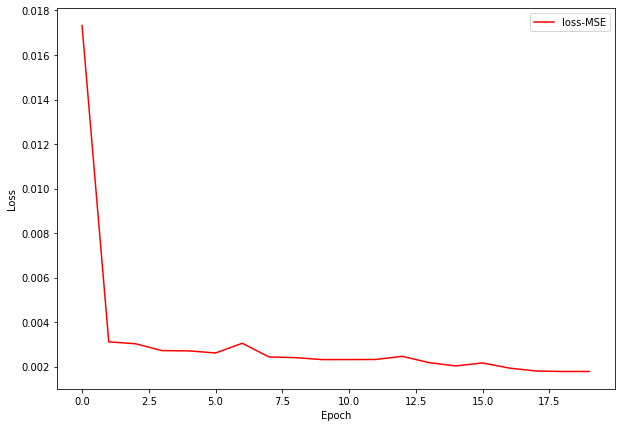

In [231]:
import matplotlib.pyplot as plt
### plot the unscaled predictions ###
unscaled_predictions = mm.inverse_transform(y_pred) # reverse scalar with inverse_transform
### configure the plot ###
print('--- model loss-MAE --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = plt.plot(history.history['loss'], color="r", label="loss-MSE")
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Import + Inspect Test Data ### 

In [185]:
import pandas as pd 
import numpy as np
test_df = pd.read_csv('FB_test_data.csv') # read in the file 
test_df = test_df.iloc[:, 1].values
print('test data frame shape:', test_df.shape)
print('--- test_df array ---')
test_df

test data frame shape: (21,)
--- test_df array ---


array([206.75    , 207.210007, 206.699997, 212.820007, 213.      ,
       217.539993, 219.199997, 219.600006, 221.610001, 220.610001,
       222.570007, 222.029999, 222.160004, 222.309998, 220.75    ,
       220.800003, 213.100006, 216.139999, 221.440002, 206.529999,
       208.429993])

--- distplot accuracy --- 


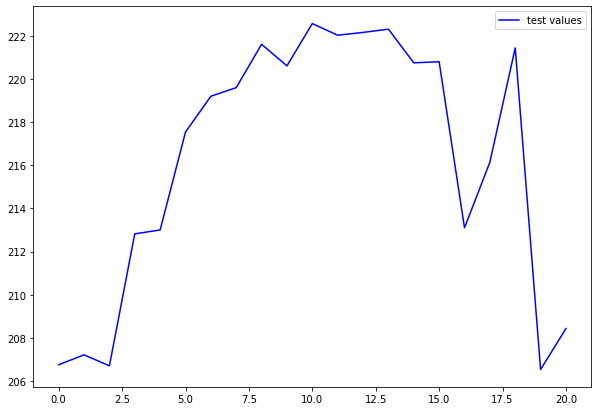

In [210]:
### visualize the test data ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = plt.plot(test_df, color="b", label="test values")
plt.legend()
plt.show()

##### Create unscaled data sets ###

In [187]:
import pandas as pd 
### read in both sets of data again ### 
usncaled_train_df = pd.read_csv('FB_training_data.csv') # read in the file 
usncaled_test_df = pd.read_csv('FB_test_data.csv') # read in the file 

In [193]:
### create the test data ###
all_data = pd.concat((usncaled_train_df['Open'], usncaled_test_df['Open']), axis = 0) # combine the 2 'Open' features 
x_test = all_data[len(all_data) - len(test_data) - 40:].values # get upperbound and lower bound of array
print('x_test shape:', x_test.shape)
print('--- x_test array ---')
x_test

x_test shape: (61,)
--- x_test array ---


array([194.550003, 195.369995, 194.029999, 191.910004, 190.      ,
       189.929993, 190.      , 194.699997, 192.929993, 194.259995,
       194.559998, 197.399994, 198.580002, 197.419998, 198.380005,
       199.520004, 200.      , 199.899994, 201.600006, 202.130005,
       197.600006, 200.      , 199.860001, 200.5     , 200.649994,
       201.660004, 200.279999, 202.350006, 196.399994, 195.270004,
       198.839996, 200.089996, 202.779999, 207.479996, 206.699997,
       206.300003, 205.570007, 208.669998, 207.860001, 204.      ,
       206.75    , 207.210007, 206.699997, 212.820007, 213.      ,
       217.539993, 219.199997, 219.600006, 221.610001, 220.610001,
       222.570007, 222.029999, 222.160004, 222.309998, 220.75    ,
       220.800003, 213.100006, 216.139999, 221.440002, 206.529999,
       208.429993])

In [194]:
### reshape test data for prediction ###
x_test = np.reshape(x_test, (-1, 1))
print('x_test shape:', x_test.shape)

x_test shape: (61, 1)


In [195]:
### feature scaling for test data ### 
# normalization, involves subtracting the minimum value of the data set and then dividing by the range of the data set
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler() # initiate the scalar   
x_test = mm.fit_transform(x_test) # fit transform the data with scalar

In [196]:
### set the timesteps for the network ### 
final_x_test = [] # create new list for x_test
for i in range(40, len(x_test)): # loop through idx's from 40 to full length
  final_x_test.append(x_test[i-40:i, 0]) # append idx's preceding 40
final_x_test = np.array(final_x_test)
### must reshape to fit tensorflow RNN layer requirements ###
final_x_test = np.reshape(final_x_test,(final_x_test.shape[0], 
                                        final_x_test.shape[1],1)) # reshape 3d
print('final_x_test shape:', final_x_test.shape)

final_x_test shape: (21, 40, 1)


#### Model tests

In [228]:
### make the predictions with the model ###
y_pred = model.predict(final_x_test)
unscaled_predictions = mm.inverse_transform(y_pred) # reverse scalar with inverse_transform

prediction data shape: (21, 1)
unscaled prediction data shape: (21, 1)


--- model predictions unscaled --- 


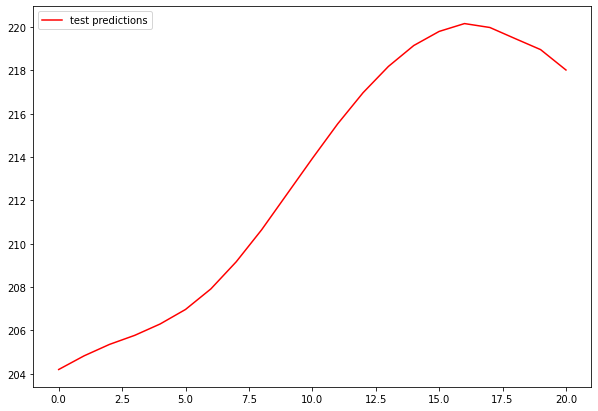

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
### plot the unscaled predictions ###
unscaled_predictions = mm.inverse_transform(y_pred) # reverse scalar with inverse_transform
### configure the plot ###
print('--- model predictions unscaled --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = plt.plot(unscaled_predictions, color="r", label="test predictions")
plt.legend()
plt.show()

--- distplot accuracy --- 


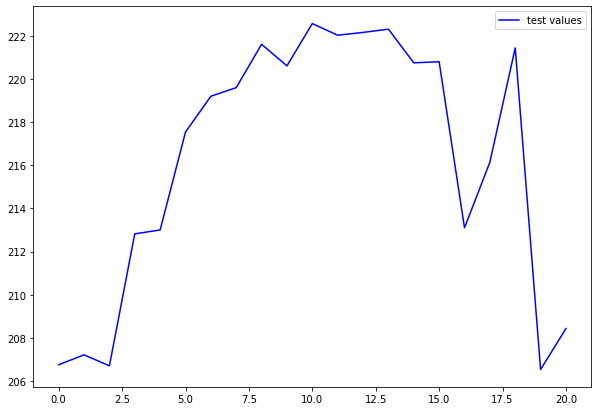

In [232]:
### visualize the test data ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = plt.plot(test_df, color="b", label="test values")
plt.legend()
plt.show()

--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


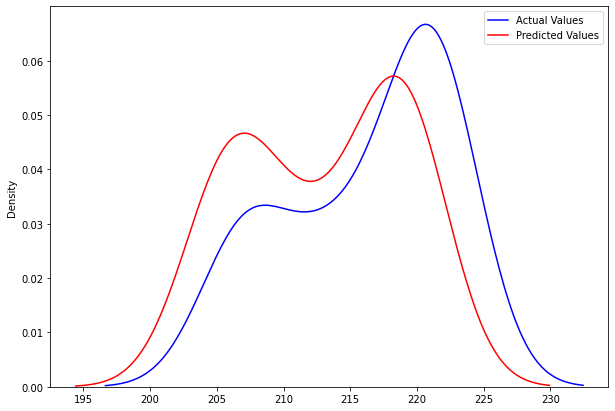

In [227]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(test_df, hist=False, color="b", label="Actual Values")
sns.distplot(unscaled_predictions, hist=False, color="r", label="Predicted Values", ax=ax1)
plt.legend()